Uses Verlet Integration to calculate the trajectory of a charged point object inside a magnetic field

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def magnetic_velocity_verlet(x0, v0, m, q, dt, n, b):
    """
    :param x0:  initial position
    :param v0:  initial velocity
    :param m:   mass of object
    :param q:   charge of object
    :param dt:  time between each time step
    :param n:   number of time steps
    :param b:   magnetic field. b(x) = magnetic field at point x
    :return:    (position, velocity)
    """
    position = np.zeros((n, 3))
    position[0] = x0
    velocity = np.zeros((n, 3))
    velocity[0] = v0
    a = q * dt / (2 * m)
    x = x0
    v = v0
    for i in range(1, n):
        d = v + np.cross(a * v, b(x))
        x = (d * dt) + x
        c = b(x) # so we don't have to recalculate mag field a bunch in next line
        v = (d + np.cross(a * d, c) + (a**2 * c * (np.dot(d, c)))) / (1 + (a**2 * c**2))
        position[i] = x 
        velocity[i] = v 
    return position, velocity

In [7]:
def b_uniform(position):
    return np.array([10, 0, 0])

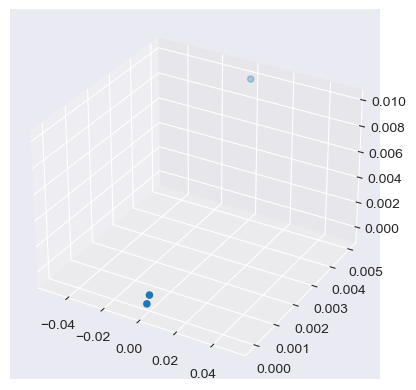

In [10]:
x0 = np.array([0, 0, 0])
v0 = np.array([0, 1, 0])
pos, vel = magnetic_velocity_verlet(x0, v0, 1, 1, .005, 5000, b_uniform)
t = np.linspace(0, 100, num=1000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos[0], pos[1], pos[2])